# Exercise 9
Oct 2 2019. Due Oct 7, 9am.

Enter the names, and describe the contributions of anybody besides yourself who contributed/collaborated. 

# Monte Carlo II
Revisit the Monte Carlo integration problem from Exercise 7. Write a new function, `monte_carlo_pi2(N)` to do the same thing as last time, but this time do not use any `for` or `while` loops. Instead use array operations.

In [1]:
import math
import numpy as np

def monte_carlo_pi2(N):
    x = np.random.random(N)
    y = np.random.random(N)    
    d = np.sqrt(x**2 + y**2)    
    in_c = d[np.where(d <= 1)]   
    return (len(in_c)/len(d)) * 4


In [2]:
#check that the function is defined, executes, and returns a floating point number
import numbers
from numpy.testing import assert_equal, assert_almost_equal
a = monte_carlo_pi2(58)
assert isinstance(a, numbers.Real) == True
assert isinstance(a, numbers.Integral) == False

In [3]:
# check that the answer is reasonable

Modify your `accuracy()` function from Exercise 7 so that it calls `monte_carlo2(N)`.

Again return a 2d array with a row for each of the 10 N values specified in Exercise 7, with columns containing N, the mean of 100 results from `monte_carlo_pi2(N)`, and their standard deviation.

In [4]:
def accuracy():
    arr = np.array([10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000])
    store = np.ndarray(shape = (len(arr),3))
    calcs = np.empty(100)
  
    for n in range(0,len(arr)):
        store[n][0] = arr[n]
        
        for m in range(0, len(calcs)):
            val = monte_carlo_pi2(arr[n])
            calcs[m] = val
        
        store[n][1] = np.average(calcs)
        store[n][2] = np.std(calcs, ddof = 1)
                            
    return store


In [5]:
# test that accuracy executes and returns a 10 row x 3 column 2d array
a = accuracy2()
assert a.ndim == 2
assert a.shape == (10,3)

NameError: name 'accuracy2' is not defined

In [ ]:
# test that first column values are correct:
assert_equal(a[:,0], np.array([10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]) )


In [ ]:
# test that values of std dev's are reasonable

In [ ]:
# test that averages are reasonable

Now copy your original `monte_carlo_pi(N)` function in from Exercise 7.

In [ ]:
import random 
import numpy as np

def monte_carlo_pi(N):
    x = np.random.random(N)
    y = np.random.random(N)
    in_c = 0
    t_c = 0
    
    for n in range(0,N):
        if(math.sqrt((x[n])**2 + (y[n])**2) <= 1):
            in_c += 1            
        t_c += 1
    return (in_c/t_c)*4


In [ ]:
a = monte_carlo_pi(500)
assert isinstance(a, numbers.Real) == True
assert isinstance(a, numbers.Integral) == False
assert a > 3 and a < 3.3

Now use the ipython "magic" built-in: `%timeit` to time how long the two different versions take to execute. The code to do this is shown below, you don't need to modify it. The -o option tells %timeit to store its results as a variable.

In [ ]:
time1 = %timeit -o monte_carlo_pi(10000)
time2 = %timeit -o monte_carlo_pi2(10000)
print("the time with monte_carlo_pi was:", time1.best )
print("the time with monte_carlo_pi2 was:", time2.best )

How do the speeds of the two approaches compare? Which approach is faster, and by approximately what factor?

There is a significant difference between the two approaches. The function monte_carlo_pi2() was faster approximately by a factor of 27.

Generate 500 random points, as in the monte carlo integration routine above, and plot them as a coloured scatter plot, as in the image in Exercise 7, where points within the quarter circle are red, and those outside are blue.
Set the aspect ratio of the plot so that the lengths of the x and y axes are the same, using `plt.axes().set_aspect()`

In [ ]:
import matplotlib.pyplot as plt

x = np.random.random(500)
y = np.random.random(500)
d = np.sqrt(x**2 + y**2)    
in_c = np.where(d <= 1)  
out_c = np.where(d > 1)

plt.axes().set_aspect('equal')
plt.scatter(x[in_c],y[in_c],c = 'r')
plt.scatter(x[out_c],y[out_c],c = 'b')
plt.show()



## Numpy Arrays and Functions

Take the `my_sign(a)` function from lecture 5.2 and rewrite it so that it works with numpy arrays as arguments. It should return an array of the same shape as its argument, where the value of each element is 1, 0 or -1 to reflect the sign of the value in the original array. It does not need to accept individual numbers as arguments, you can assume that an array is passed in.

In [ ]:
def my_sign(a):
    a[np.where(a>0)] = 1
    a[np.where(a==0)] = 0
    a[np.where(a<0)] = -1
    return a


In [ ]:
# test that my_sign take an array
a = my_sign(np.array([-4,4,2,0,3]))




In [ ]:
# check that the correct values are returned
assert_equal(my_sign(np.array([2,4,1,0,-3,-7,27])), np.array([1,1,1,0,-1,-1,1]))
assert_equal(my_sign(np.array([-2.3,1.,0.,-7.6])), np.array([-1,1,0,-1]))

In [ ]:
# check higher dimension arrays
b = np.array([[5,-3,2],[9,0,-2]])
assert_equal(my_sign(b),np.array([[1,-1,1],[1,0,-1]]))

## Arrays

In this problem, you will calculate $\exp(-r^2)$ on a 2-dimensional grid, similar to the one used in lecture 5.2.
Use `numpy.meshgrid()` to generate a 2000x2000 point grid that covers the range of -3 to +3 on both axes, then generate an image plot similar to the one in the lecture notes. Don't worry if the colours aren't the same. You might consider both `numpy.arange()` and `numpy.linspace()` for generating the points. 

Do your calculations in a function: `exp_r2a()`. Define the function in the first cell, In the second cell, call the function and time how long it takes, storing the result from %timeit in variable `t1`. Pass `%timeit` with arguments `-n1 -r1 -o` so that the plot will only be generated once (by default `%timeit` will run the command you give it several times)

In [9]:
def exp_r2a():
    x1d = np.linspace(-3,3, num = 2000)
    y1d = np.linspace(-3,3,num = 2000)
    x2d, y2d = np.meshgrid(x1d, y1d)
    r2d = x2d**2 + y2d**2
    z = np.exp(-r2d)
    plt.imshow(z,extent=(-3, 3, -3, 3),cmap = 'jet')
    plt.show()    

#play around with origin

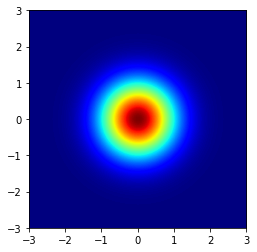

588 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [10]:
t1 = %timeit -n1 -r1 -o exp_r2a()

Define a new function, `exp_r2b()` that does the same thing as `exp_r2a()` but uses two nested loops to calculate the point values. Start by creating an array to store the values with ` r2d = np.zeros((1000,1000))` and then use the loops to fill in the elements point by point. Again plot the result, and then time how long the function to do the calculation and plot the result takes.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def exp_r2b():
    r2d = np.zeros((1000,1000))
    interval = 6/1000
    point = -3
    
    for n in range(0,r2d.shape[0]): #rows
        for m in range(0,r2d.shape[1]):#columns
            if(n == 0):
                r2d[n][m] = point**2 #setting up axes
                r2d[m][n] = point**2
                point += interval   
            if(n>0 and m != 0):
                r2d[n][m] = (np.sqrt(r2d[0][m]))**2 + (np.sqrt(r2d[n][0]))**2
        
            
    z = np.exp(-r2d)    
    plt.imshow(z,extent=(-3, 3, -3, 3),cmap = 'jet')
    plt.show() 


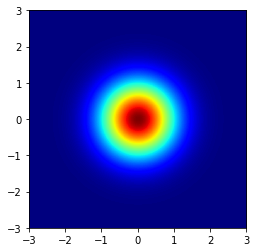

6.96 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [11]:
t2 = %timeit -n1 -r1 -o exp_r2b()

Finally, compare the times taken for function that uses array operations compared to the one using loops. What have you learned about the speed of doing computations with loops vs. array operations?

It took significantly longer to for the loopes to plot the data. While the array operations took around 520ms, the loops took multiple seconds(around 7s). For speed and efficency it's clear that the using array operations is the ideal choice.